# Диагностика рака груди: является ли новообразование злокачественным или доброкачественным?

## Данные

Источник: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Параметры вычислены из оцифрованного изображения тонкоигольной аспирационной пункционной биопсии (ТАПБ, англ. FNA) массы груди. Процедура ТАПБ проводится в двух случаях:

1) Когда неизвестен генезис опухоли и его природа находится под вопросом. В данном случае стоит вопрос о выявлении злокачественного новообразования с целью хирургического вмешательства.

2) Если диагноз подтвежден (генезис опухоли известен), то для оценки эффективности проводимого лечения или для получения ткани для специальных иследованиях.

Каждый параметр описывает характеристики ядер клеток, представленных на изображении.

* ID Number - идентификационный номер изображения. Порядковый признак. Тип: целочисленный;
* Diagnosis - определяет, является ли опухоль злокачественной или доброкачетсвенной (М = malignant (злокачетсвенная), B = benign ( доброкачественная)). Категориальный признак. Тип: строковый [M, B];

Десять реальных значений, вычисленных для каждого ядра клетки:

* radius - среднее значение расстояния от центра образования до точек периметра;
* texture - плотность образования (стандартное отклонение значений оттенков серого (grayscale));
* perimetr - периметр;
* area - площадь;
* smoothness - гладкость (локальное изменение длины радиуса);
* compactness (perimetr^2 / area - 1.0) - компактность;
* concavity - вогнутость, выраженность вогнутых участков контура;
* concave points - количество вогнутых участков контура;
* symmetry - симметрия;
* fractal dimension - фрактальная размерность ("coastline approximation" - 1 (рус. измерительный шест))

Далее по изображениям были вычислены среднее, стандартная ошибка и "худшее" или наибольшее (среднее трех наибольших значений) этих параметров. Именно эти данные представлены в выборке. Каждое из значений записано с точностью до 4х знаков. 

Вещественный признак. Тип: Вещественные числа. 

## Подключение библиотек

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [127]:
%matplotlib inline

## Загрузка данных и их первичный анализ

In [128]:
data = pd.read_csv("data_bc.csv",sep = ";",header = 0, index_col = 0)

In [129]:
data.shape

(569, 31)

In [130]:
data.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean           ...             \
id                                                     ...              
842302                0.14710         0.2419           ...              
842517                0.07017         0.1812           ...              
84300903              0.12790         0.2069           ...              
84348301              0.10520         0.2597           ...              
84358402              0.10430         0.1809           ...              

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
842302           25.38          17.33           184.60      2019.0   
842517           24.99          23.41           158.80      1956.0   
84300903         23.57          25.53           152.50      1709.0   
84348301         14.91          26.50            98.87       567.7   
84358402         22.54          16.67           152.20      1575.0   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
842302              0.1622             0.6656           0.7119   
842517              0.1238             0.1866           0.2416   
84300903            0.1444             0.4245           0.4504   
84348301            0.2098             0.8663           0.6869   
84358402            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [131]:
#len(data.id.unique())

Выборка содержит 569 наблюдений каждое из которых описано с помощью 31 признака. ID Number является уникальным, поэтому с помощью этого параметра будут пронумерованы наблюдения. Далее необходимо проверь данные на наличие пропущенных значений.

### Проверка на пропущенные значения

In [132]:
#data.isnull().values.any()
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

В данных отсутствуют пропущенные значения.

### Количество злокачественных и доброкачественных опухолей

Изобразим на гистограмме и круговой диаграмме количество злокачественных опухолей и доброкачетсвенных.

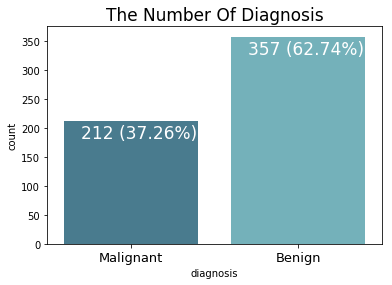

In [133]:
diagnosis = data.diagnosis
ax = sns.countplot (diagnosis, label = "Count", palette = 'GnBu_d')
ax.set_title ("The Number Of Diagnosis", fontsize = 17)
labels = ["Malignant" , "Benign"]
ax.set_xticklabels(labels, fontsize = 13)

for i in ax.patches:
    ax.text(i.get_x() + .1, i.get_height() - 30,
            str(i.get_height()) + ' (' + str(round((i.get_height()/len(diagnosis))*100, 2)) + '%)', fontsize = 17, color ='white')

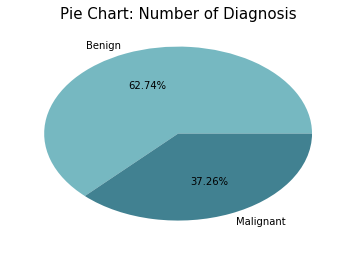

In [134]:
sums = diagnosis.groupby(diagnosis).count()
colors =  ['#76b8c1', '#418191']
labels = ['Benign', 'Malignant']
plt.title('Pie Chart: Number of Diagnosis', fontsize = 15 )
plt.pie(sums, autopct='%0.2f%%', 
        labels = labels, 
        colors = colors)

plt.show()

Заметим, что в выборке преобладают наблюдения клеток доброкачественной опухоли. Стоит отметить, что соотношение в выборке наблюдений доброкачественной опухоли к злокачественной примерно 2:1, что свидетельствует о том, что в целом выборка не является репрезентативной. На следующем шаге необходимо выяснить, какие признаки имеют большую прогностическую ценность, а какие нет.

## Статистический анализ данных 

Проведем статистических анализ имеющихся данных.

In [135]:
#data.describe()
data[diagnosis == 'M'].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   212.000000    212.000000      212.000000   212.000000   
mean     17.462830     21.604906      115.365377   978.376415   
std       3.203971      3.779470       21.854653   367.937978   
min      10.950000     10.380000       71.900000   361.600000   
25%      15.075000     19.327500       98.745000   705.300000   
50%      17.325000     21.460000      114.200000   932.000000   
75%      19.590000     23.765000      129.925000  1203.750000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       212.000000        212.000000      212.000000           212.000000   
mean          0.102898          0.145188        0.160775             0.087990   
std           0.012608          0.053987        0.075019             0.034374   
min           0.073710          0.046050        0.023980             0.020310   
25%           0.094010          0.109600        0.109525             0.064620   
50%           0.102200          0.132350        0.151350             0.086280   
75%           0.110925          0.172400        0.203050             0.103175   
max           0.144700          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     212.000000              212.000000           ...              
mean        0.192909                0.062680           ...              
std         0.027638                0.007573           ...              
min         0.130800                0.049960           ...              
25%         0.174050                0.056598           ...              
50%         0.189900                0.061575           ...              
75%         0.209850                0.067075           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    212.000000     212.000000       212.000000   212.000000   
mean      21.134811      29.318208       141.370330  1422.286321   
std        4.283569       5.434804        29.457055   597.967743   
min       12.840000      16.670000        85.100000   508.100000   
25%       17.730000      25.782500       119.325000   970.300000   
50%       20.590000      28.945000       138.000000  1303.000000   
75%       23.807500      32.690000       159.800000  1712.750000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        212.000000         212.000000       212.000000   
mean           0.144845           0.374824         0.450606   
std            0.021870           0.170372         0.181507   
min            0.088220           0.051310         0.023980   
25%            0.130475           0.244475         0.326425   
50%            0.143450           0.356350         0.404900   
75%            0.155975           0.447850         0.556175   
max            0.222600           1.058000         1.170000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            212.000000      212.000000               212.000000  
mean               0.182237        0.323468                 0.091530  
std                0.046308        0.074685                 0.021553  
min                0.028990        0.156500                 0.055040  
25%                0.152750        0.276500                 0.076302  
50%                0.182000        0.310300                 0.087600  
75%                0.210675        0.359225                 0.102625  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

In [136]:
data[diagnosis == 'B'].describe()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   357.000000    357.000000      357.000000  357.000000       357.000000   
mean     12.146524     17.914762       78.075406  462.790196         0.092478   
std       1.780512      3.995125       11.807438  134.287118         0.013446   
min       6.981000      9.710000       43.790000  143.500000         0.052630   
25%      11.080000     15.150000       70.870000  378.200000         0.083060   
50%      12.200000     17.390000       78.180000  458.400000         0.090760   
75%      13.370000     19.760000       86.100000  551.100000         0.100700   
max      17.850000     33.810000      114.600000  992.100000         0.163400   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        357.000000      357.000000           357.000000     357.000000   
mean           0.080085        0.046058             0.025717       0.174186   
std            0.033750        0.043442             0.015909       0.024807   
min            0.019380        0.000000             0.000000       0.106000   
25%            0.055620        0.020310             0.015020       0.158000   
50%            0.075290        0.037090             0.023440       0.171400   
75%            0.097550        0.059990             0.032510       0.189000   
max            0.223900        0.410800             0.085340       0.274300   

       fractal_dimension_mean           ...             radius_worst  \
count              357.000000           ...               357.000000   
mean                 0.062867           ...                13.379801   
std                  0.006747           ...                 1.981368   
min                  0.051850           ...                 7.930000   
25%                  0.058530           ...                12.080000   
50%                  0.061540           ...                13.350000   
75%                  0.065760           ...                14.800000   
max                  0.095750           ...                19.820000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     357.000000       357.000000   357.000000        357.000000   
mean       23.515070        87.005938   558.899440          0.124959   
std         5.493955        13.527091   163.601424          0.020013   
min        12.020000        50.410000   185.200000          0.071170   
25%        19.580000        78.270000   447.100000          0.110400   
50%        22.820000        86.920000   547.400000          0.125400   
75%        26.510000        96.590000   670.000000          0.137600   
max        41.780000       127.100000  1210.000000          0.200600   

       compactness_worst  concavity_worst  concave points_worst  \
count         357.000000       357.000000            357.000000   
mean            0.182673         0.166238              0.074444   
std             0.092180         0.140368              0.035797   
min             0.027290         0.000000              0.000000   
25%             0.112000         0.077080              0.051040   
50%             0.169800         0.141200              0.074310   
75%             0.230200         0.221600              0.097490   
max             0.584900         1.252000              0.175000   

       symmetry_worst  fractal_dimension_worst  
count      357.000000               357.000000  
mean         0.270246                 0.079442  
std          0.041745                 0.013804  
min          0.156600                 0.055210  
25%          0.240600                 0.070090  
50%          0.268700                 0.077120  
75%          0.298300                 0.085410  
max          0.422800                 0.148600  

[8 rows x 30 columns]

Такое разбиение дает больше возможностей для анализа выборки. Иссходя из двух таблиц выше, можно сделать **следующие гипотезы**:

**1) злокачественные опухоли в среднем имеют больший периметр и площадь, однако, меньший радиус по сравнению с доброкачественными;**

**2) симметричность обоих видов новоообразований примерно одинакова. Возможно данный параметр не является определяющим;**

**3) злокачетсвенные клетки имеют вогнутости, в то время как доброкачественные могут их не содержать. Также у злокачественных вогнутости более выражены.**


Проанализируем влияние признаков друг на друга. Для этого воспользуемся библиотекой **seaborn** и изобразим зависимости между каждой парой факторов c помощью точечных графиков. При этом наблюдения каждого из диагнозов окрасим в разные цвета.  

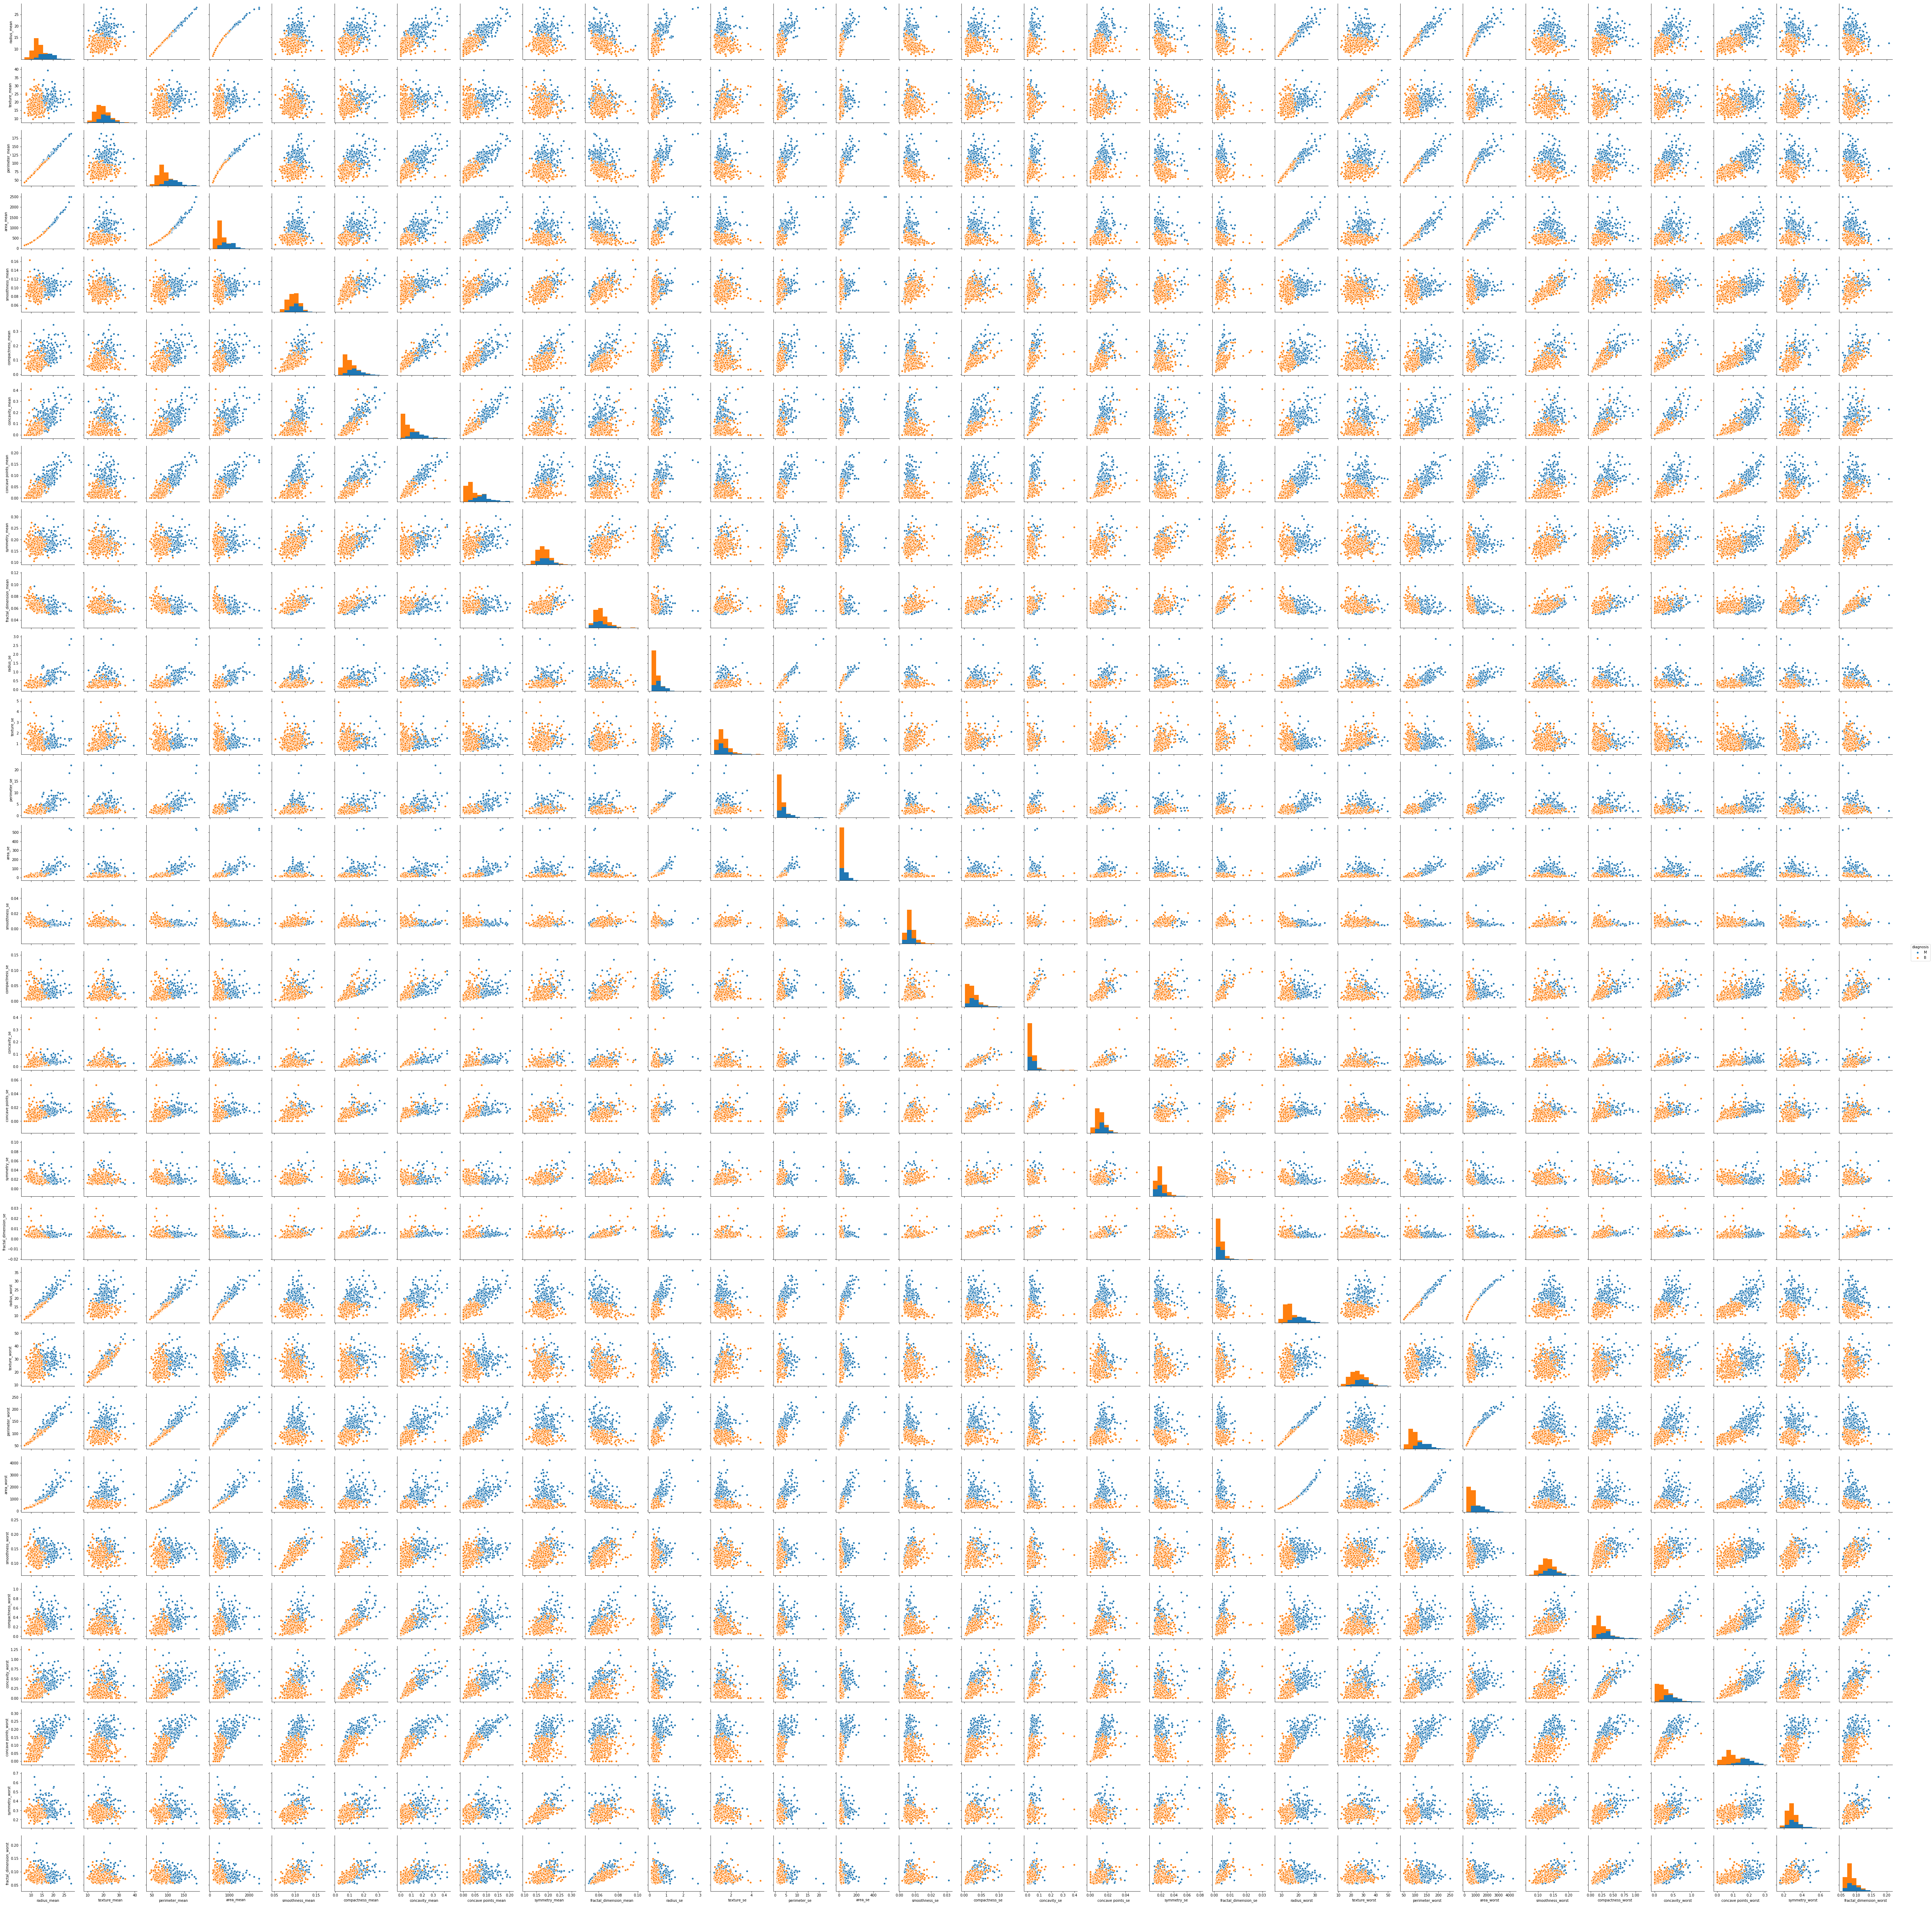

In [137]:
ax = sns.pairplot(data, hue="diagnosis")
#ax.savefig('pairplot')

Исходя из этих точечных графиков и гистограмм распределений можно сделать выводы о зависимостях между некоторыми признаками:

**1) Между некоторами парами признаков существует сильная линейная взаимсовязь. Это видно на примере radius_mean и perimeter_mean;**

**2) Существуют пары признаков с параболической взаимосвязью. Например perimeter_mean и area_mean;**

**3) Существуют такие взаимосвязи признаков, которые позволяют достаточно хорошо различить 2 диагноза. Например, perimeter_mean и concavity_mean;**

**4) Из гистограмм распределения следуеn то, что не существует какого-либо явного признака позволяющего отличить доброкачетсвенную опухоль от злокачественной.** 

**5) Некоторые признаки, такие как concave points_worst и smoothness_worst лучше исключить из модели, так как по гистограмме распределения видны выбросы. **

In [138]:
#plt.plot(data.radius_mean[diagnosis == 'B'], data.perimeter_mean[diagnosis == 'B'], 'b+')
#plt.plot(data.radius_mean[diagnosis == 'M'], data.perimeter_mean[diagnosis == 'M'], 'g+')
#plt.ylabel('perimeter_mean')
#plt.xlabel('radius_mean')
#plt.show()

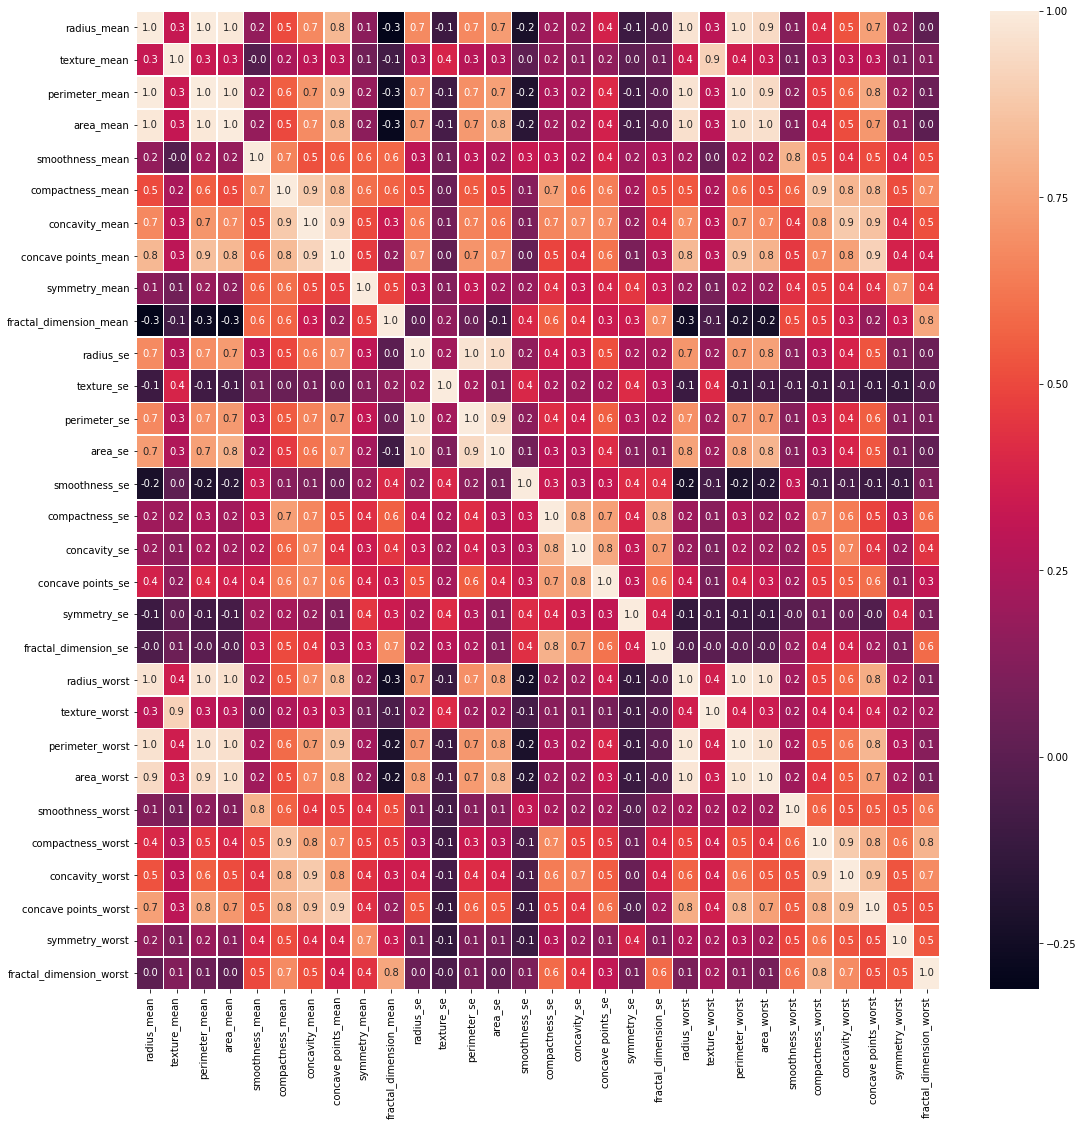

In [139]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt = '.1f', ax = ax)

Из **корреляционной матрицы** видно, что некоторые из признаков сильно коррелируют между собой. Так, например, можно выделить группу **radius, perimeter, area**. Вне зависимости от того возьмем мы среднее, стандартную ошибку или худшее, любая пара этой группы будет коррелировать с силой близкой к 1 (единице). Действительно, если вернутся  Таким образом, в модель желательно не включать все эти факторы одновременно, так как может возникнуть мульколлинеарность. Аналогичная ситуация с группой факторов **сompactness, concavity, concave points**, однако, тут можно выбрать по одному из 2ух групп. Также существуют пары с отрицательной корреляцией. 

## Отбор факторов

Основываяся на проведенном статистическом анализе, мы можем исключить факторы, которые могут испортить качество нашей модели, а также являться причиной её переобучения.

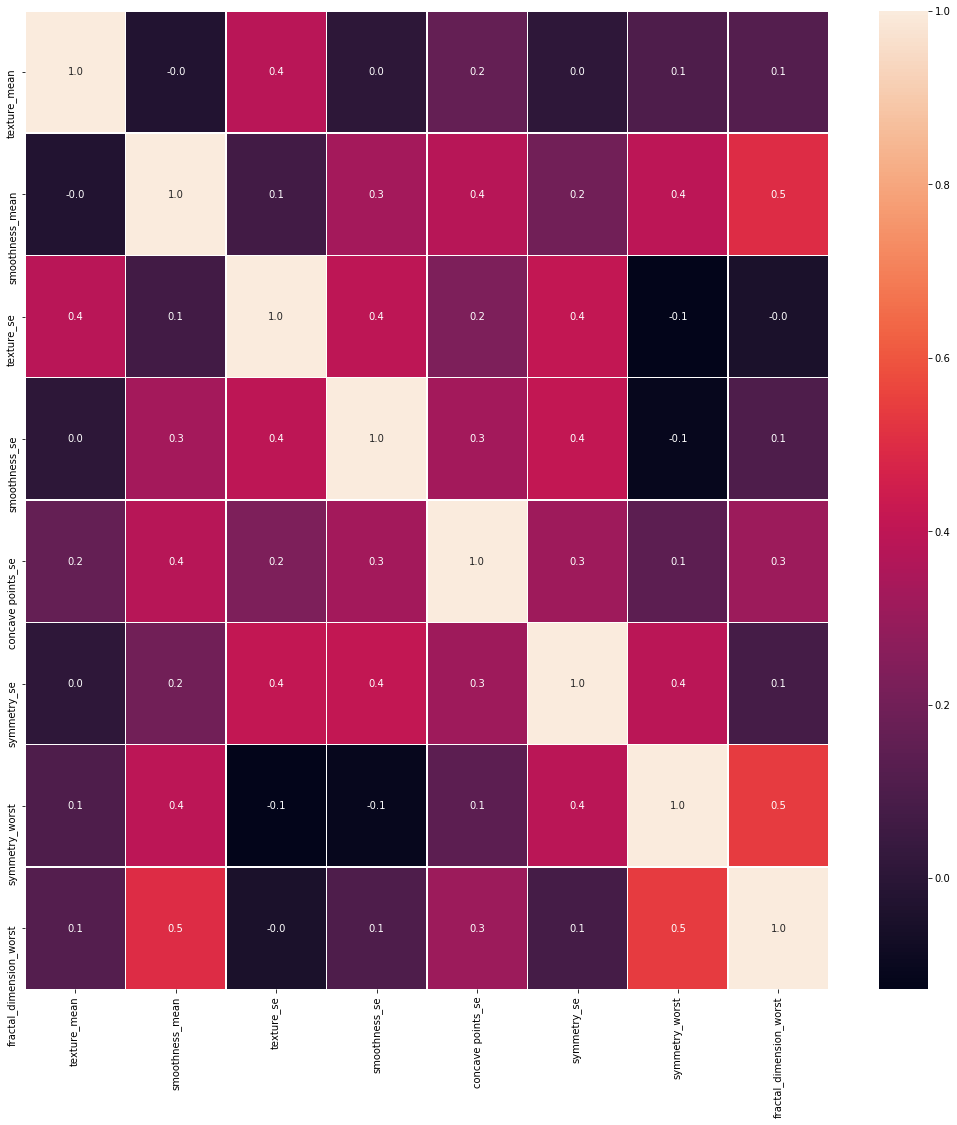

In [188]:
drop = ['radius_mean', 'perimeter_mean','texture_worst', 'radius_se', 'area_se', 'perimeter_worst', 'area_worst', 
        'radius_worst','concavity_worst', 'compactness_worst', 'compactness_mean', 'concavity_mean', 'concave points_mean',
       'concavity_se', 'fractal_dimension_mean', 'smoothness_worst', 'compactness_se', 'concave points_worst',
       'symmetry_mean', 'perimeter_se','fractal_dimension_se', 'area_mean']

####### drop area_mean
#drop = ['radius_mean', 'perimeter_mean','texture_worst', 'radius_se', 'area_se', 'perimeter_worst', 'area_worst', 
#        'radius_worst','concavity_worst', 'compactness_worst', 'compactness_mean', 'concavity_mean', 'concave points_mean',
#       'concavity_se', 'fractal_dimension_mean', 'smoothness_worst', 'compactness_se', 'concave points_worst',
#       'symmetry_mean', 'perimeter_se','fractal_dimension_se', 'area_mean']

data_sel = data.drop(drop, axis = 1 ) 
data_sel.head()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_sel.corr(), annot=True, linewidths =.5, fmt = '.1f', ax =ax)

После отбора осталось 9 признаков. Можно приступать к построению моделей.

In [141]:
#data_sel.head(5)

## Обучение и отложенный тест

In [189]:
y = data_sel.diagnosis
x = data_sel.drop('diagnosis', axis = 1)

In [190]:
#y.head(30)

In [191]:
y = pd.get_dummies(y)['M']

In [192]:
#y.head(30)

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 10)

In [194]:
#plt.figure(figsize = (16, 6))

#plt.subplot(1,2,1)
#plt.hist(y_train)
#plt.title('train data')

#plt.subplot(1,2,2)
#plt.hist(y_test)
#plt.title('test data')

## Масштабирование данных

In [195]:
scaler = StandardScaler()
scaler.fit(x_train,  y_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test= scaler.transform(x_test)

## Построение модели Logistic Regression

In [196]:
regressor = LogisticRegression()
regressor.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [197]:
regressor.fit(scaled_x_train, y_train)
predicted = regressor.predict(scaled_x_test)

## Метрики

### Confusion matrix (Матрица ошибок)

             precision    recall  f1-score   support

          0       0.90      0.91      0.91       112
          1       0.83      0.81      0.82        59

avg / total       0.88      0.88      0.88       171



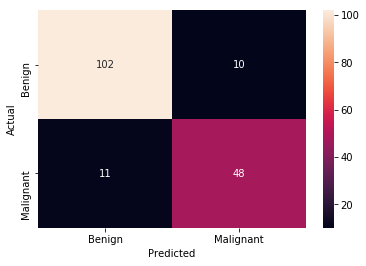

In [198]:
cm = confusion_matrix(y_test, predicted)
labels = ["Benign", "Malignant"]
cm = pd.DataFrame(cm, index = labels, columns = labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, annot = True, fmt = "d")

rep = classification_report(y_test, predicted)
print(rep)

### ROC_AUC

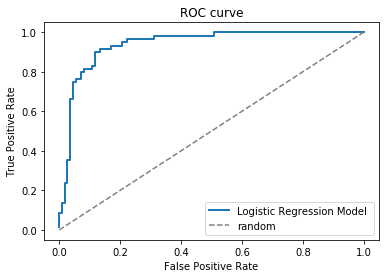

ROC_AUC score: 0.93916


In [199]:
pp = regressor.predict_proba(scaled_x_test)[:,1] #probability prediction

plt.figure(figsize = (6, 4))
fpr, tpr, _ = roc_curve(y_test, pp, pos_label=1)
plt.plot(fpr, tpr, lw = 2, label = 'Logistic Regression Model ')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') #ROC кривая случайной классификации
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

print('ROC_AUC score: {0:0.5f}'.format(
     metrics.roc_auc_score(y_test, pp)))

### PR_AUC 

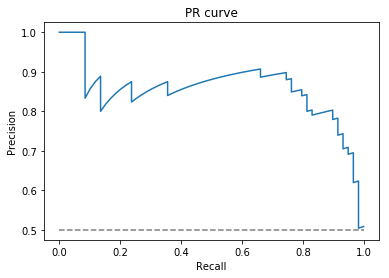

PR_AUC score: 0.85643


In [200]:
precision, recall, _ = precision_recall_curve(y_test, pp)
plt.plot(recall, precision,)
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'grey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
#plt.legend(loc = "lower right")
plt.show()

print('PR_AUC score: {0:0.5f}'.format(
     metrics.average_precision_score(y_test, pp)))

## Качество 99% ?

In [201]:
print (y_test[:10])

id
87164      1
924342     0
9013005    0
9012315    1
906290     0
8710441    0
923748     0
861853     0
889719     1
8810955    1
Name: M, dtype: uint8


In [202]:
print (regressor.predict(scaled_x_test)[:10])

[1 0 0 1 0 1 0 0 1 1]


In [203]:
print (list (map (lambda x : np.round(x, 2), regressor.coef_)))

[array([ 1.49,  1.03, -0.39, -0.45,  1.79, -1.31,  1.54, -0.6 ])]


In [204]:
data_sel.iloc[-10:]

diagnosis  texture_mean  smoothness_mean  texture_se  smoothness_se  \
id                                                                           
925291         B         23.93          0.09261       2.904       0.008200   
925292         B         27.15          0.09929       1.492       0.007256   
925311         B         29.37          0.07449       3.896       0.007594   
925622         M         30.62          0.10480       1.205       0.004625   
926125         M         25.09          0.10990       1.026       0.006399   
926424         M         22.39          0.11100       1.256       0.010300   
926682         M         28.25          0.09780       2.463       0.005769   
926954         M         28.08          0.08455       1.075       0.005903   
927241         M         29.33          0.11780       1.595       0.006522   
92751          B         24.54          0.05263       1.428       0.007189   

        concave points_se  symmetry_se  symmetry_worst  \
id                                                       
925291            0.01267      0.01488          0.2112   
925292            0.01626      0.02080          0.2250   
925311            0.00000      0.01989          0.1566   
925622            0.01608      0.02137          0.4089   
926125            0.02624      0.02057          0.2929   
926424            0.02454      0.01114          0.2060   
926682            0.01678      0.01898          0.2572   
926954            0.01557      0.01318          0.2218   
927241            0.01664      0.02324          0.4087   
92751             0.00000      0.02676          0.2871   

        fractal_dimension_worst  
id                               
925291                  0.08732  
925292                  0.08321  
925311                  0.05905  
925622                  0.14090  
926125                  0.09873  
926424                  0.07115  
926682                  0.06637  
926954                  0.07820  
927241                  0.12400  
92751                   0.07039

## Pipeline

In [205]:
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])

In [206]:
pipeline.fit(x_train, y_train)
metrics.roc_auc_score(y_test, pipeline.predict_proba(x_test)[:,1])

0.9391646489104116

## Подбор параметров

In [207]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__C', 'regression__class_weight', 'regression__dual', 'regression__fit_intercept', 'regression__intercept_scaling', 'regression__max_iter', 'regression__multi_class', 'regression__n_jobs', 'regression__penalty', 'regression__random_state', 'regression__solver', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

In [208]:
parameters_grid1 = {
    'regression__fit_intercept' :  ['True', 'False'],  #const
    'regression__penalty' : [ 'l1', 'l2'],              #l1 - Lasso, l2 - Ridge
    'scaling__with_mean': [0, 1],
}

grid1 = GridSearchCV(pipeline, parameters_grid1, scoring = 'roc_auc', cv = 3)
grid1.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__fit_intercept': ['True', 'False'], 'regression__penalty': ['l1', 'l2'], 'scaling__with_mean': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [209]:
grid1.best_estimator_

Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=1, with_std=True)), ('regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept='True',
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [210]:
print (grid1.best_score_)
print (grid1.best_params_)

0.9361366586372533
{'regression__fit_intercept': 'True', 'regression__penalty': 'l2', 'scaling__with_mean': 1}


## Оценка на отложенном тесте

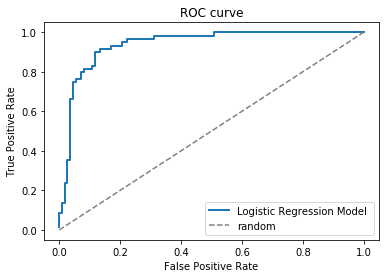

ROC_AUC score: 0.93916


In [211]:
pp = grid1.best_estimator_.predict_proba(x_test)[:,1] #probability prediction

plt.figure(figsize = (6, 4))
fpr, tpr, _ = roc_curve(y_test, pp, pos_label=1)
plt.plot(fpr, tpr, lw = 2, label = 'Logistic Regression Model ')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') #ROC кривая случайной классификации
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

print('ROC_AUC score: {0:0.5f}'.format(
     metrics.roc_auc_score(y_test, pp)))

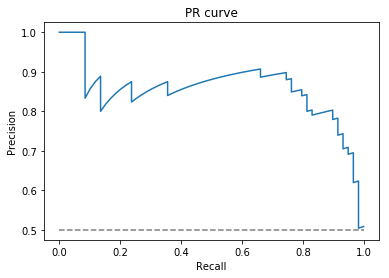

PR_AUC score: 0.85643


In [214]:
precision, recall, _ = precision_recall_curve(y_test, pp)
plt.plot(recall, precision,)
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'grey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
#plt.legend(loc = "lower right")
plt.show()

print('PR_AUC score: {0:0.5f}'.format(
     metrics.average_precision_score(y_test, pp)))

## Построение модели KNeighbours

In [215]:
model = KNeighborsClassifier()

In [216]:
model.fit(scaled_x_train, y_train)
predicted = model.predict(scaled_x_test)

## Метрики

### Confusion matrix (Матрица ошибок)

             precision    recall  f1-score   support

          0       0.93      0.88      0.91       112
          1       0.80      0.88      0.84        59

avg / total       0.89      0.88      0.88       171



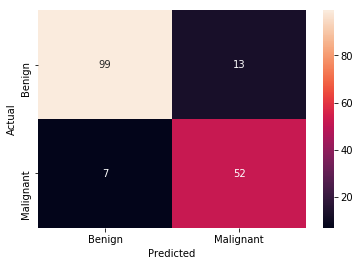

In [217]:
cm = confusion_matrix(y_test, predicted)
labels = ["Benign", "Malignant"]
cm = pd.DataFrame(cm, index = labels, columns = labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, annot = True, fmt = "d")

rep = classification_report(y_test, predicted)
print(rep)

### ROC_AUC

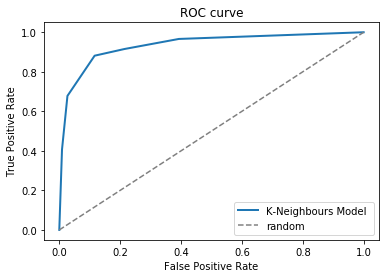

ROC_AUC score: 0.93417


In [218]:
pp = model.predict_proba(scaled_x_test)[:,1] #probability prediction

plt.figure(figsize = (6, 4))
fpr, tpr, _ = roc_curve(y_test, pp, pos_label=1)
plt.plot(fpr, tpr, lw = 2, label = 'K-Neighbours Model ')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

print('ROC_AUC score: {0:0.5f}'.format(
     metrics.roc_auc_score(y_test, pp)))

### PR_AUC

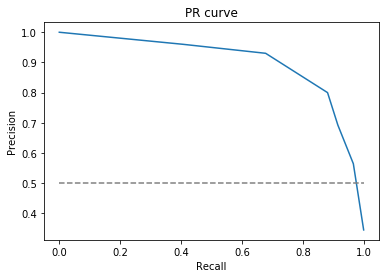

PR_AUC score: 0.86935


In [219]:
precision, recall, _ = precision_recall_curve(y_test, pp)
plt.plot(recall, precision,)
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'grey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
#plt.legend(loc = "lower right")
plt.show()

print('PR_AUC score: {0:0.5f}'.format(
     metrics.average_precision_score(y_test, pp)))

## Подбор параметров 

In [220]:
parameters_grid2 = {
    'algorithm' :  ['kd_tree','brute','ball_tree'],
    'n_neighbors' : [ 5, 8, 10, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}
grid2 = GridSearchCV(KNeighborsClassifier(), parameters_grid2,scoring = 'roc_auc', cv = 3)
grid2.fit(scaled_x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'algorithm': ['kd_tree', 'brute', 'ball_tree'], 'n_neighbors': [5, 8, 10, 12], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [221]:
grid2.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='distance')

In [222]:
print (grid2.best_score_)
print (grid2.best_params_)

0.9324927149163106
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


## Оценка на отложенном тесте

### ROC_AUC

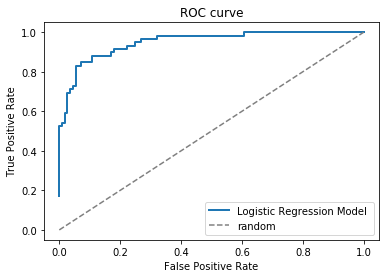

ROC_AUC score: 0.95036


In [223]:
pp = grid2.best_estimator_.predict_proba(scaled_x_test)[:,1] #probability prediction

plt.figure(figsize = (6, 4))
fpr, tpr, _ = roc_curve(y_test, pp, pos_label=1)
plt.plot(fpr, tpr, lw = 2, label = 'Logistic Regression Model ')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') #ROC кривая случайной классификации
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

print('ROC_AUC score: {0:0.5f}'.format(
     metrics.roc_auc_score(y_test, pp)))

### PR_AUC

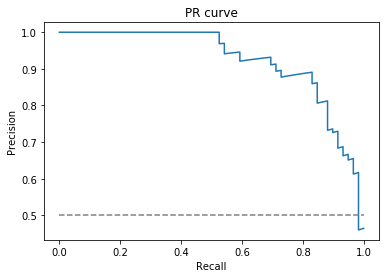

PR_AUC score: 0.92427


In [224]:
precision, recall, _ = precision_recall_curve(y_test, pp)
plt.plot(recall, precision,)
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'grey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
#plt.legend(loc = "lower right")
plt.show()

print('PR_AUC score: {0:0.5f}'.format(
     metrics.average_precision_score(y_test, pp)))

## Модель Random Forest

In [176]:
model = RandomForestClassifier(random_state = 0) 
model.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [177]:
model = model.fit(scaled_x_train,y_train)
predicted = model.predict(scaled_x_test)

In [178]:
top_features = pd.Series(model.feature_importances_, index = x.columns).sort_values(ascending = False)
top_features

area_mean                  0.469094
symmetry_worst             0.127102
texture_mean               0.126354
concave points_se          0.087268
smoothness_mean            0.059102
symmetry_se                0.038167
smoothness_se              0.038141
fractal_dimension_worst    0.036335
texture_se                 0.018436
dtype: float64

## Метрики

### Confusion matrix (Матрица ошибок)

             precision    recall  f1-score   support

          0       0.96      0.95      0.95       112
          1       0.90      0.93      0.92        59

avg / total       0.94      0.94      0.94       171



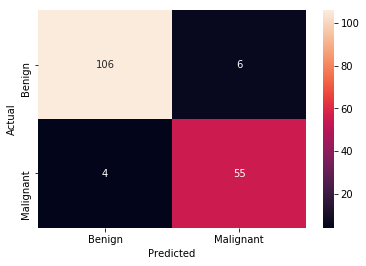

In [179]:
cm = confusion_matrix(y_test, predicted)
labels = ["Benign", "Malignant"]
cm = pd.DataFrame(cm, index = labels, columns = labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm, annot = True, fmt = "d")

rep = classification_report(y_test, predicted)
print(rep)

### ROC_AUC

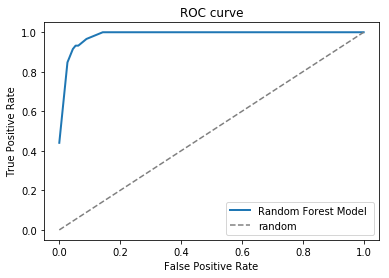

ROC_AUC score: 0.98479


In [180]:
pp = model.predict_proba(scaled_x_test)[:,1] #probability prediction

plt.figure(figsize = (6, 4))
fpr, tpr, thresholds = roc_curve(y_test, pp, pos_label=1)
plt.plot(fpr, tpr, lw = 2, label = 'Random Forest Model ')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

print('ROC_AUC score: {0:0.5f}'.format(
     metrics.roc_auc_score(y_test, pp)))

### PR_AUC

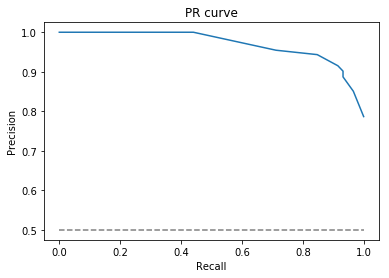

PR_AUC score: 0.96029


In [181]:
precision, recall, _ = precision_recall_curve(y_test, pp)
plt.plot(recall, precision,)
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'grey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
#plt.legend(loc = "lower right")
plt.show()

print('PR_AUC score: {0:0.5f}'.format(
     metrics.average_precision_score(y_test, pp)))

## Подбор параметров

In [182]:
parameters_grid3 = {
    'max_depth' :  np.linspace(10, 30, num = 5),
    'n_estimators' : [ 20, 50, 100, 200],
    'max_features' : [1/3,'log2']
}
grid3 = GridSearchCV(RandomForestClassifier(), param_grid = parameters_grid3,scoring = 'roc_auc', cv = 3)
grid3.fit(scaled_x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([10., 15., 20., 25., 30.]), 'n_estimators': [20, 50, 100, 200], 'max_features': [0.3333333333333333, 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [183]:
grid3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15.0, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [184]:
print (grid3.best_score_)
print (grid3.best_params_)

0.981219263862754
{'max_depth': 15.0, 'max_features': 'log2', 'n_estimators': 50}


## Оценка на отложенном тесте

### ROC_AUC

In [185]:
pp = grid3.best_estimator_.predict_proba(scaled_x_test)[:,1] #probability prediction

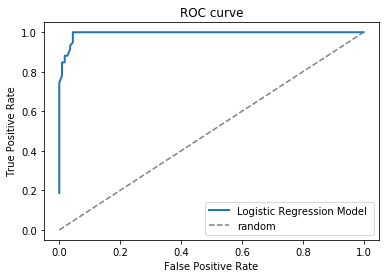

ROC_AUC score: 0.99402


In [186]:
plt.figure(figsize = (6, 4))
fpr, tpr, _ = roc_curve(y_test, pp, pos_label=1)
plt.plot(fpr, tpr, lw = 2, label = 'Logistic Regression Model ')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') #ROC кривая случайной классификации
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

print('ROC_AUC score: {0:0.5f}'.format(
     metrics.roc_auc_score(y_test, pp)))

### PR_AUC

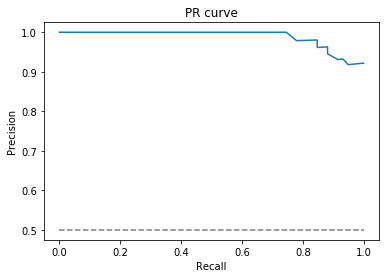

PR_AUC score: 0.98776


In [187]:
precision, recall, _ = precision_recall_curve(y_test, pp)
plt.plot(recall, precision,)
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color = 'grey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
#plt.legend(loc = "lower right")
plt.show()

print('PR_AUC score: {0:0.5f}'.format(
     metrics.average_precision_score(y_test, pp)))